# TED TALK ANALYSIS

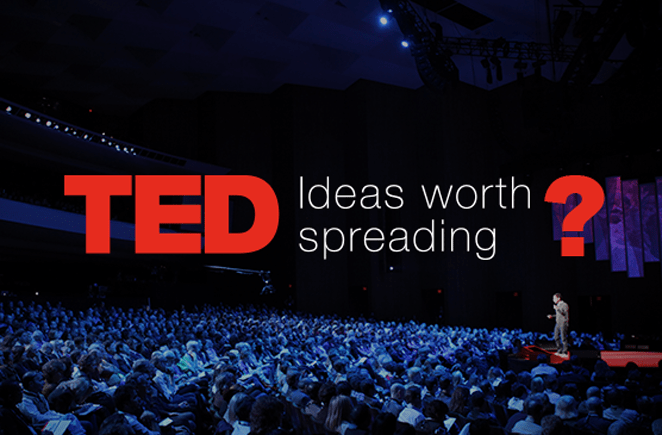

In [884]:
from IPython.display import Image
Image("https://i0.wp.com/geoawesomeness.com/wp-content/uploads/2017/01/TED_Talk-Banner.png")

### The Dataset has been taken from the following Source: 

https://www.kaggle.com/rounakbanik/ted-talks

### Group Member Names:

- Ashwini Vispute: 182001294

- Samiddha Banerjee: 182000153

- Vaibhavi Rane: 182003146

# Why TED TALK???

- TED is a nonprofit devoted to spreading ideas, usually in the form of short, powerful talks (18 minutes or less) 
- TED has been in business of talking for over 30 years where it has inspired a whole generation of public speakers covering Technology, Entertainment & Design in more than 100 languages
- The shear volume of information which is gained which is also entirely for free which primarily drives TED Talk
- The Speakers in TED Talk are not just people talking & teaching they are educators who have potential to change minds and influence legislation
- Thus we are making an attempt to find out what drives TED Talk

In [885]:
#Import Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pylab import rcParams

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

import seaborn as sns
sns.set_style('whitegrid')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


import ast
from collections import defaultdict
import datetime
from pandas.plotting import parallel_coordinates
from scipy.stats import pearsonr
import re


%matplotlib inline

In [886]:
ted= pd.read_csv("C:/Users/samid/Desktop/course/ML & Stat/ted-talks/ted_main.csv", low_memory=False)
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n,47227110
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'coun

In [887]:
ted.shape

(2544, 17)

### What is there in our data?

- name: The official name of the TED Talk. Includes the title and the speaker.
- title: The title of the talk
- description: A blurb of what the talk is about.
- main_speaker: The first named speaker of the talk.
- speaker_occupation: The occupation of the main speaker.
- num_speaker: The number of speakers in the talk.
- duration: The duration of the talk in seconds.
- event: The TED/TEDx event where the talk took place.
- published_date: The Unix timestamp for the publication of the talk on TED.com
- comments: The number of first level comments made on the talk.
- tags: The themes associated with the talk.
- languages: The number of languages in which the talk is available.
- ratings: A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- related_talks: A list of dictionaries of recommended talks to watch next.
- url: The URL of the talk.
- \views: The number of views on the talk.

In [888]:
pd.isnull(ted).sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [889]:
#Converting Unix Timestamp into date

ted['duration'] = ted['duration']/60
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n,47227110
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxi

In [890]:
print (ted['languages'][ted['languages'] == 0].count())
ted[ted['languages'] == 0].head()

86


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
58,222,"Two Pilobolus dancers perform ""Symbiosis."" Does it trace the birth of a relationship? Or the co-evolution of symbiotic species? Music: ""God Music,"" George Crumb; ""Fratres,"" Arvo Part; ""Morango...Almost a Tango,"" Thomas Oboe Lee.",13.750000,TED2005,1109289600,0,Pilobolus,"Pilobolus: A dance of ""Symbiosis""",1,1170979860,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}, {'id': 3, 'name': 'Courageous', 'count': 142}, {'id': 9, 'name': 'Ingenious', 'count': 420}, {'id': 8, 'name': 'Informative', 'count': 18}, {'id': 2, 'name': 'Confusing', 'count': 53}, {'id': 21, 'name': 'Unconvincing', 'count': 22}, {'id': 11, 'name': 'Longwinded', 'count': 58}, {'id': 10, 'name': 'Inspiring', 'count': 525}, {'id': 22, 'name': 'Fascinating', 'count': 846}, {'id': 7, 'name': 'Funny', 'count': 21}, {'id': 23, 'name': 'Jaw-dropping', 'count': 2011}, {'id': 24, 'name': 'Persuasive', 'count': 34}, {'id': 25, 'name': 'OK', 'count': 81}, {'id': 26, 'name': 'Obnoxious', 'count': 22}]","[{'id': 40, 'hero': 'https://pe.tedcdn.com/images/ted/381_480x360.jpg', 'speaker': 'Frans Lanting', 'title': 'The story of life in photographs', 'duration': 977, 'slug': 'frans_lanting_s_lyrical_nature_photos', 'viewed_count': 1697184}, {'id': 188, 'hero': 'https://pe.tedcdn.com/images/ted/24710_480x360.jpg', 'speaker': 'Raul Midon', 'title': '""Tembererana""', 'duration': 640, 'slug': 'raul_midon_plays_all_the_answers_and_tembererana', 'viewed_count': 403089}, {'id': 60, 'hero': 'https://pe.tedcdn.com/images/ted/b538bc5fb569cc2a617db5ddc1e42935bceb00c6_2880x1620.jpg', 'speaker': 'Anna Deavere Smith', 'title': 'Four American characters', 'duration': 1385, 'slug': 'anna_deavere_smith_s_american_character', 'viewed_count': 978825}]",Dance company,"['dance', 'entertainment', 'nature', 'performance', 'science', 'science and art']","A dance of ""Symbiosis""",https://www.ted.com/talks/pilobolus_perform_symbiosis\n,3051507
115,27,"The avant-garde string quartet Ethel performs the third movement from Phil Kline's four-part suite ""The Blue Room and Other Stories."" Searching melodic lines show off the deep, emotional musicality of these passionate players.",3.566667,TED2006,1138838400,0,Ethel,"Ethel: A string quartet plays ""Blue Room""",1,1182184140,"[{'id': 1, 'name': 'Beautiful', 'count': 216}, {'id': 3, 'name': 'Courageous', 'count': 6}, {'id': 7, 'name': 'Funny', 'count': 3}, {'id': 21, 'name': 'Unconvincing', 'count': 24}, {'id': 2, 'name': 'Confusing', 'count': 10}, {'id': 11, 'name': 'Longwinded', 'count': 14}, {'id': 10, 'name': 'Inspiring', 'count': 54}, {'id': 22, 'name': 'Fascinating', 'count': 48}, {'id': 23, 'name': 'Jaw-dropping', 'count': 19}, {'id': 26, 'name': 'Obnoxious', 'count': 10}, {'id': 25, 'name': 'OK', 'count': 57}, {'id': 24, 'name': 'Persuasive', 'count': 8}, {'id': 9, 'name': 'Ingenious', 'count': 8}, {'id': 8, 'name': 'Informative', 'count': 0}]","[{'id': 103, 'hero': 'https://pe.tedcdn.com/images/ted/1d7e013f1870ec08fce3c48348881a9eac074ab6_1600x1200.jpg', 'speaker': 'Evelyn Glennie', 'title': 'How to truly listen', 'duration': 1929, 'slug': 'evelyn_glennie_shows_how_to_listen', 'viewed_count': 4165577}, {'id': 117, 'hero': 'https://pe.tedcdn.com/images/ted/7087_480x360.jpg', 'speaker': 'Natalie MacMaster', 'title': 'Cape Breton fiddling in reel time', 'duration': 311, 'slug': 'natalie_macmaster_fiddles_in_reel_time', 'viewed_count': 717002}, {'id': 218, 'hero': 'https://pe.tedcdn.com/images/ted/9a3db95a0bd7697a4579115adcdaf17db7a68e7b_800x600.jpg', 'speaker': 'Pamelia Kurstin', 'title': 'The untouchable music of the theremin', 'duration': 1151, 'slug': 'pamelia_kurstin_plays_the_theremin', 'viewed_count': 1687183}]",String quartet,"['cello', 'collaboration', 'culture', 'entertainment', 'live music', 'performance', 'violin']","A string quartet plays ""Blue Room""",https:/

In [891]:
ted['languages'] = ted['languages'].replace(0, 1)
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity\n,47227110
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxi

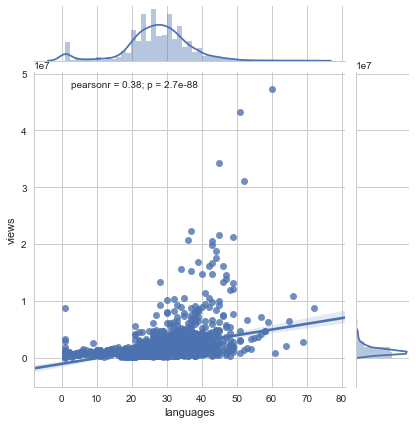

In [892]:
sns.jointplot(x=ted['languages'], y=ted['views'], kind='reg')

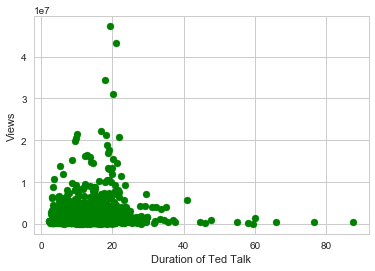

In [893]:
import matplotlib.pyplot as plt
plt.scatter(ted.duration,ted.views, color= 'green')
plt.xlabel('Duration of Ted Talk')
plt.ylabel('Views')
plt.show()

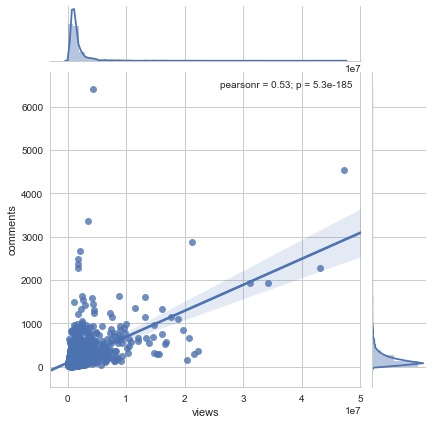

In [894]:
sns.jointplot(x=ted['views'], y=ted['comments'], kind='reg')

In [895]:
occ_fp = ted.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occ_fp.columns = ['occupation', 'count']
occ_fp = occ_fp.sort_values('count', ascending=False)
occ_fp

,occupation,count
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


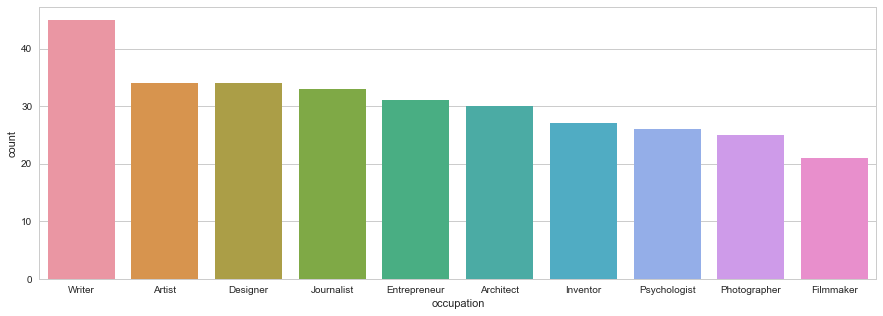

In [896]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='count', data=occ_fp.head(10))
plt.show()

(0, 4000000.0)

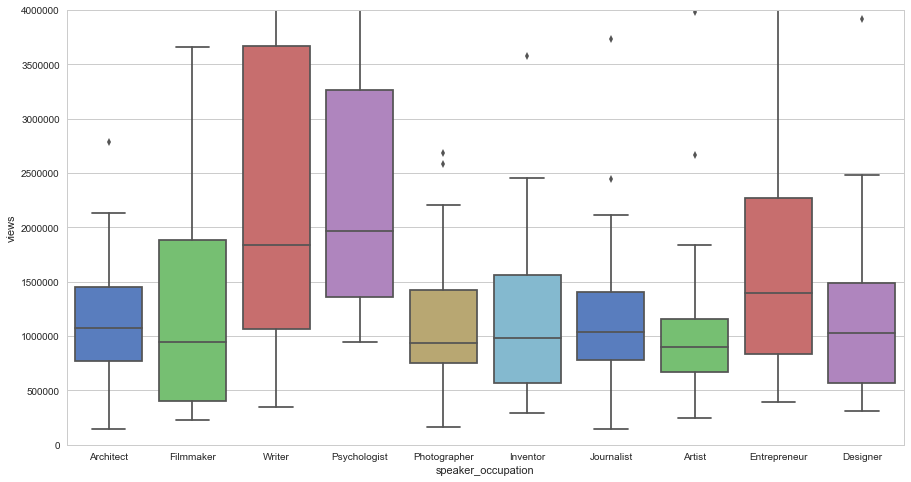

In [897]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,8))
sns.boxplot(x='speaker_occupation', y='views', data=ted[ted['speaker_occupation'].isin(occ_fp.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

# Question 1. Which TED Talks have received above average and below average ratings? 

- The column which we are going to use for analysing the above question is the rating column displayed below:

- The column 'rating' is a dictionary with key-value pairs of Id,name and count


- {'id':	1,	'name':	'Beautiful',	'count':	xx}
- {'id':	2,	'name':	'Confusing',	'count':	xx}
- {'id':	3,	'name':	'Courageous',	'count':	xx}
- {'id':	7,	'name':	'Funny',	    'count':	xx}
- {'id':	8,	'name':	'Informative',	'count':	xx}
- {'id':	9,	'name':	'Ingenious',	'count':	xx}
- {'id':	10,	'name':	'Inspiring',	'count':	xx}
- {'id':	11,	'name':	'Longwinded',	'count':	xx}
- {'id':	21,	'name':	'Unconvincing',	'count':	xx}
- {'id':	22,	'name':	'Fascinating',	'count':	xx}
- {'id':	23,	'name':	'Jaw-dropping',	'count':	xx}
- {'id':	24,	'name':	'Persuasive',	'count':	xx}
- {'id':	25,	'name':	'OK',		    'count':	xx}
- {'id':	26,	'name':	'Obnoxious',	'count':	xx}


- We have got counts associated with responses for each TED Talk
- We are planning to form 14 different columns of each response with related count
- Moreover, we will sum up counts related to Beautiful, Courageous, Funny, Ingenious, Informative, Fascinating, Jaw-dropping, Pursuisive,Inspiring responses together in one single column as a collection of Positive responses and we will sum up counts related to confusing, unconvincing, longwinded, obnoxious responses in another column as Negative/Neutral responses
- In this way we have calculated positive and negative responses with respect to each TED Talk
- Furthermore, we will calculate the difference between positive & negative comments and thus genarate  two categories:  average and below average responses.


- Finally, we will implment the below algorithms and find the best model to classify the data:
 
 1.Logistics Regression
 
 2.Naive Bayes
 
 3.SVM

In [898]:
ted['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 4

In [899]:
ted['ratings'] = ted['ratings'].apply(lambda x: eval(str(x)))

In [900]:
Funny= []
Beautiful=[]
Ingenious=[]
Courageous=[]
Longwinded=[]
Confusing=[]
Informative=[]
Fascinating=[]
Unconvincing=[]
Persuasive=[]
Jawdropping=[]
OK=[]
Obnoxious=[]
Inspiring=[]

In [901]:
for i in range(len(ted['ratings'])):
    for j in range(len(ted['ratings'][i])):
        if((ted['ratings'][i][j]['name'])== 'Funny'):
            data=ted['ratings'][i][j]['count']
            Funny.append(data)
        else:
            if((ted['ratings'][i][j]['name'])== 'Beautiful'):
                data=ted['ratings'][i][j]['count']
                Beautiful.append(data)
            else:
                if((ted['ratings'][i][j]['name'])== 'Ingenious'):
                    data=ted['ratings'][i][j]['count']
                    Ingenious.append(data)
                else:
                    if((ted['ratings'][i][j]['name'])== 'Courageous'):
                        data=ted['ratings'][i][j]['count']
                        Courageous.append(data)
                    else:
                        if((ted['ratings'][i][j]['name'])== 'Longwinded'):
                            data=ted['ratings'][i][j]['count']
                            Longwinded.append(data)
                        else:
                            if((ted['ratings'][i][j]['name'])== 'Confusing'):
                                data=ted['ratings'][i][j]['count']
                                Confusing.append(data)
                            else:
                                if((ted['ratings'][i][j]['name'])== 'Informative'):
                                    data=ted['ratings'][i][j]['count']
                                    Informative.append(data)
                                else:
                                    if((ted['ratings'][i][j]['name'])== 'Fascinating'):
                                        data=ted['ratings'][i][j]['count']
                                        Fascinating.append(data)
                                    else:
                                        if((ted['ratings'][i][j]['name'])== 'Unconvincing'):
                                            data=ted['ratings'][i][j]['count']
                                            Unconvincing.append(data)
                                        else:
                                            if((ted['ratings'][i][j]['name'])== 'Persuasive'):
                                                data=ted['ratings'][i][j]['count']
                                                Persuasive.append(data)
                                            else:
                                                if((ted['ratings'][i][j]['name'])== 'Jaw-dropping'):
                                                    data=ted['ratings'][i][j]['count']
                                                    Jawdropping.append(data)
                                                else:
                                                    if((ted['ratings'][i][j]['name'])== 'OK'):
                                                        data=ted['ratings'][i][j]['count']
                                                        OK.append(data)
                                                    else:
                                                        if((ted['ratings'][i][j]['name'])== 'Obnoxious'):
                                                            data=ted['ratings'][i][j]['count']
                                                            Obnoxious.append(data)
                                                        else:
                                                            if((ted['ratings'][i][j]['name'])== 'Inspiring'):
                                                                data=ted['ratings'][i][j]['count']
                                                                Inspiring.append(data)

In [902]:
rating_df = pd.DataFrame(
    {'Funny': Funny,
     'Beautiful': Beautiful,
     'Ingenious': Ingenious,
     'Courageous': Courageous,
     'Longwinded': Longwinded,
     'Confusing': Confusing,
     'Informative': Informative,
     'Fascinating': Fascinating,
     'Unconvincing': Unconvincing,
     'Persuasive': Persuasive,
     'Jaw-dropping': Jawdropping,
     'OK': OK,
     'Obnoxious': Obnoxious,
     'Inspiring': Inspiring
     })


In [903]:
ted['Funny'] = Funny
ted['Beautiful'] = Beautiful
ted['Ingenious'] = Ingenious
ted['Courageous'] = Courageous
ted['Longwinded'] = Longwinded
ted['Confusing'] = Confusing
ted['Informative'] = Informative
ted['Fascinating'] = Fascinating
ted['Unconvincing'] = Unconvincing
ted['Persuasive'] = Persuasive
ted['Jawdropping'] = Jawdropping
ted['OK'] = OK
ted['Obnoxious'] = Obnoxious
ted['Inspiring'] = Inspiring

In [904]:
poistive=[]
negative=[]

#positive = [Beautiful, Funny,Ingenious,Courageous,Informative,Fascinating,Persuasive,Jawdropping,Inspiring]
positive= [sum(x) for x in zip(Beautiful, Funny,Ingenious,Courageous,Informative,Fascinating,Persuasive,Jawdropping,Inspiring)]
len(positive)

2544

In [905]:
#negative = [Longwinded,Confusing,Unconvincing,OK,Obnoxious]
negative= [sum(x) for x in zip(Longwinded,Confusing,Unconvincing,OK,Obnoxious)]
len(negative)

2544

In [906]:
ted['positive'] = positive
ted['negative'] = negative

In [907]:
#difference between positive negative
#list(map(operator.sub, positive, negative))
Difference=[]
Difference=[x - y for x, y in zip(positive, negative)]
ted['Difference']=Difference


In [908]:
ted

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Fascinating,Unconvincing,Persuasive,Jawdropping,OK,Obnoxious,Inspiring,positive,negative,Difference
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,10581,300,10704,4439,1174,209,24924,91538,2312,89226
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,132,258,268,116,203,131,413,2169,767,1402
2,124,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",21.433333,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,166,104,230,54,146,142,230,2327,497,1830
3,200,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",18.600000,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,132,36,460,230,85,35,1070,3487,241,3246
4,593,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",19.833333,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,4606,67,2542,3736,248,61,2893,25062,558,24504
5,672,"Tony Robbins discusses the ""invisible forces"" that motivate everyone's actions -- and high-fives Al Gore in the front row.",21.750000,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,...,1350,377,2423,669,441,335,5211,13617,1739,11878
6,919,"When two young Mormon missionaries knock on Julia Sweeney's door one day, it touches off a quest to completely rethink her own beliefs, in this excerpt from Sweeney's solo show ""Letting Go of God.""",16.533333,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,...,316,225,311,61,308,290,438,4910,1088,3822
7,46,"Architect Joshua Prince-Ramus takes the audience on dazzling, dizzying virtual tours of three recent projects: the Central Library in Seattle, the Museum Plaza in Louisville and the Charles Wyly Theater in Dallas.",19.966667,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seattle's library,1,1152490260,...,153,26,37,57,63,5,175,879,145,734
8,852,"Philosopher Dan Dennett calls for religion -- all religion -- to be taught in schools, so we can understand its nature as a natural phenomenon. Then he takes on The Purpose-Driven Life, disputing its claim that, to be moral, one must deny evolution.",24.750000,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all religion -- in schools,1,1153181460,...,313,283,764,60,154,83,441,3179,767,2412
9,900,"Pastor Rick Warren, author of ""The Purpose-Driven Life,"" reflects on his own crisis of purpose in the wake of his book's wild success. He explains his belief that God's intention is for each of us to use our talents and influence to do good.",21.033333,TED2006,1140825600,31,Rick Warren,Rick Warren: A life of purpose,1,1153181460,...,459,838,1543,209,245,371,2556,6456,1871,4585


In [909]:
Avg = ted['Difference'].mean()
Avg

2010.311320754717

In [910]:
#from statistics import median
#Median= median(Difference)
#Median

In [911]:
avg = []
for i in Difference:
    if(i > Avg):
        avg.append(1)        
    else:
        avg.append(0)
        
ted['Average Above/Below']= avg
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Unconvincing,Persuasive,Jawdropping,OK,Obnoxious,Inspiring,positive,negative,Difference,Average Above/Below
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,19.400000,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,...,300,10704,4439,1174,209,24924,91538,2312,89226,1
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",16.283333,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,258,268,116,203,131,413,2169,767,1402,0
2,124,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",21.433333,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,...,104,230,54,146,142,230,2327,497,1830,0
3,200,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",18.600000,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,...,36,460,230,85,35,1070,3487,241,3246,1
4,593,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",19.833333,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,67,2542,3736,248,61,2893,25062,558,24504,1


In [912]:
ted['Average Above/Below'].value_counts()

0    1907
1    637 
Name: Average Above/Below, dtype: int64

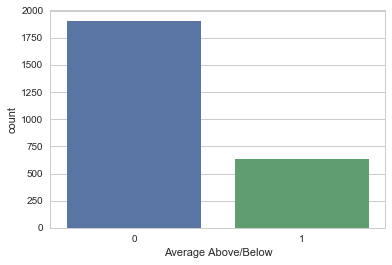

In [913]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.countplot(x = 'Average Above/Below', data = ted)
plt.show()

## Classification of Ted Talk into Positive and Negative Rating

In [914]:
X = ted.iloc[:, [0,2,5,8]].values
#X = ted.iloc[:, [2,5]].values
y = ted.iloc[:, 34].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## K- NEAREST NEIGHBOUR

In [915]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [917]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[454  29]
 [ 90  63]]


In [918]:
# evaluate accuracy from sklearn
from sklearn.metrics import accuracy_score
print ("The accuracy of KNN method",accuracy_score(y_test, y_pred)*100)

The accuracy of KNN method 81.2893081761


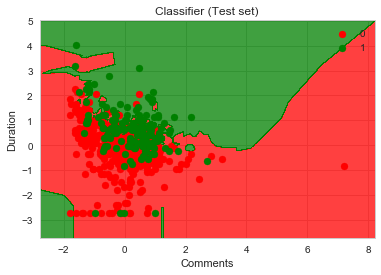

In [761]:
# Visualising the Test set result

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Comments')
plt.ylabel('Duration')
plt.legend()
plt.show()

## NAIVE BAYES

In [919]:
from sklearn import datasets

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [920]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[458  25]
 [ 78  75]]


In [921]:
accuracy=gnb.score(X_test, y_test)
print("Accuracy of Naive Bayes model is ", accuracy*100)

Accuracy of Naive Bayes model is  83.8050314465


## SUPPORT VECTOR MACHINE

In [922]:
from sklearn import svm
import numpy as np
clf = svm.SVC()

In [923]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [924]:
prd= clf.predict(X_test)

In [925]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

Confusion Matrix
 [[465  18]
 [ 75  78]]


In [926]:
print("The score for SVM Classification :",clf.score(X_test,y_test)*100)

The score for SVM Classification : 85.3773584906


## Result of Classification

1. KNN - 81.29% 
2. Naive Bias - 83.81%
3. SVM - 85.37%

## From the above results, it can be concluded that SVM performs the best in classifying the data in Positive and Negative Ratings

#### In which year were the talks most Inspiring?

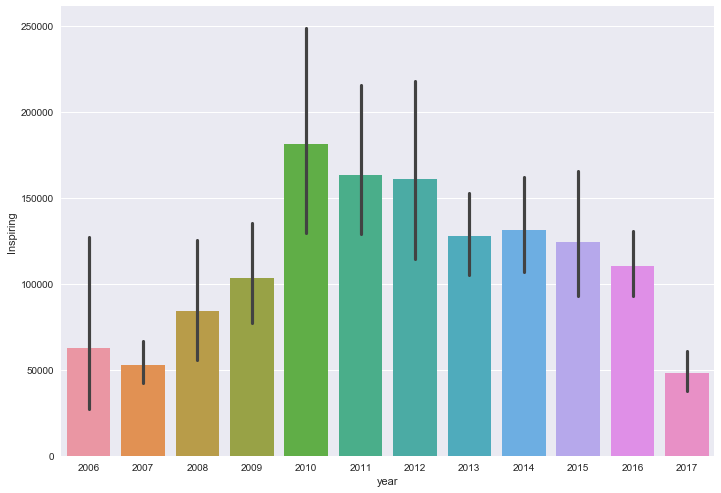

In [933]:
sns.barplot(x=temp_fp['year'], y=temp_fp['Inspiring'], estimator=np.sum)

#### In which year were the talks most Informative?

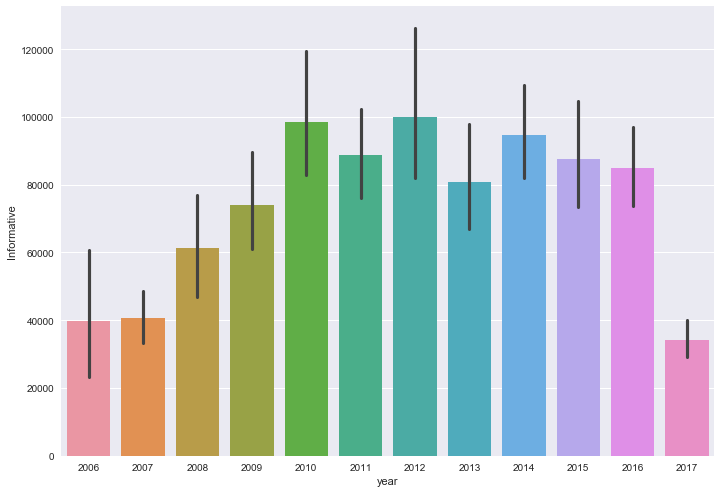

In [934]:
sns.barplot(x=temp_fp['year'], y=temp_fp['Informative'], estimator=np.sum)

#### In which year were the talks most Confusing?

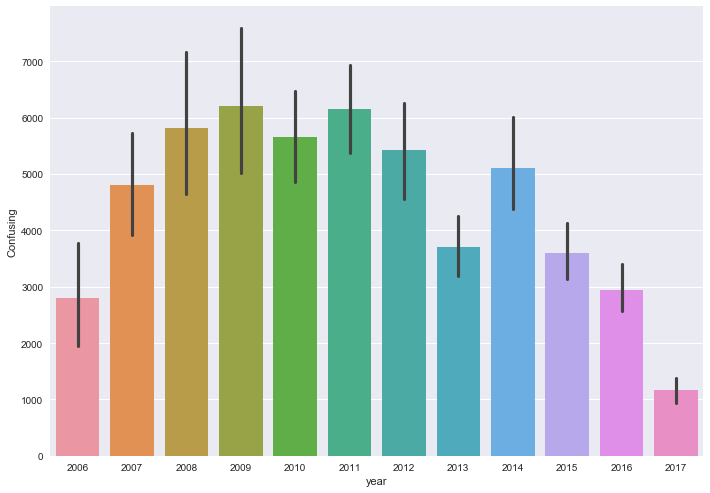

In [935]:
sns.barplot(x=temp_fp['year'], y=temp_fp['Confusing'], estimator=np.sum)

#### In which year were the talks most Obnoxious?

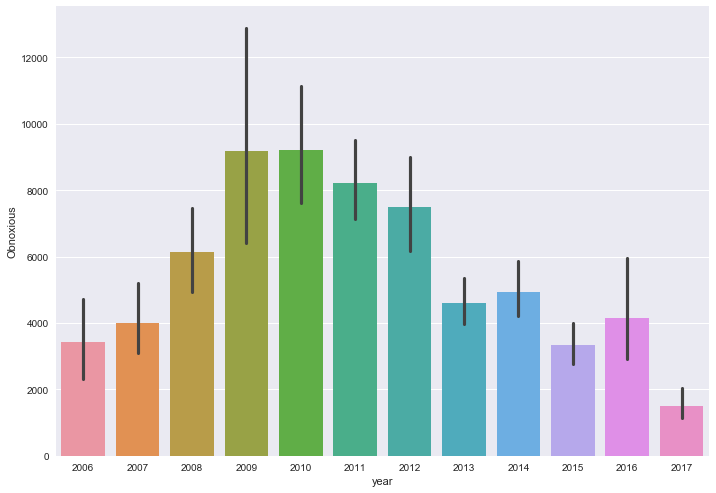

In [936]:
sns.barplot(x=temp_fp['year'], y=temp_fp['Obnoxious'], estimator=np.sum)

#### In which year were the talks rated most Positive?

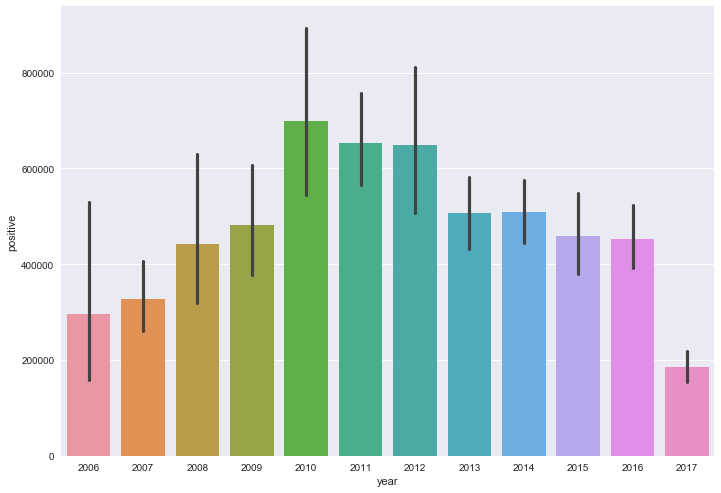

In [937]:
sns.barplot(x=temp_fp['year'], y=temp_fp['positive'], estimator=np.sum)

#### In which year were the talks most Negative?

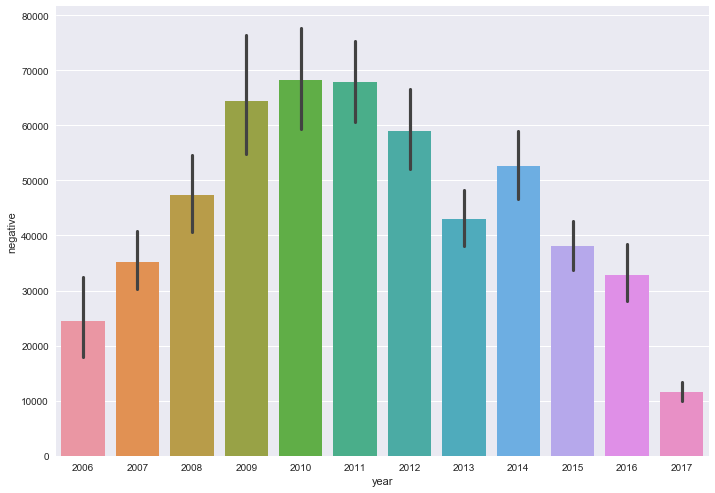

In [938]:
sns.barplot(x=temp_fp['year'], y=temp_fp['negative'], estimator=np.sum)

# Question 2:  Finding the best fit model and factors make TED Talk more trending? 

In [939]:
X = ted.iloc[:, [0,2,5,8,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].values
#X=[comments,duration,languages, num of speakers, rating[:]]
y = ted.iloc[:, 16].values
#y=[viwes]


## Backward Feature Selection

In [940]:
import statsmodels.formula.api as sm

X = ted.iloc[:, [0,2,5,8,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].values
regressor_OLS=sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     908.8
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        02:28:11   Log-Likelihood:                -39012.
No. Observations:                2544   AIC:                         7.806e+04
Df Residuals:                    2526   BIC:                         7.817e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -389.1177    120.614     -3.226      0.001    -625.630    -152.606
x2          6679.8063   3776.759      1.769      0.077    -726.054    1.41e+04
x3          7557.1096   2339.425      3.230      0.001    2969.724    1.21e+04
x4         -6.235e+04   7.26e+04     -0.859      0.390   -2.05e+05    7.99e+04
x5           801.0925     49.777     16.093      0.000     703.484     898.701
x6           209.1423     79.196      2.641      0.008      53.847     364.438
x7           600.3882    127.933      4.693      0.000     349.523     851.253
x8           657.0470     81.838      8.029      0.000     496.570     817.524
x9         -3835.5654    881.425     -4.352      0.000   -5563.956   -2107.175
x10         3711.9417   1082.298      3.430      0.001    1589.660    5834.224
x11         1024.9752     94.793     10.813      0.000     839.096    1210.854
x12          581.2691     92.846      6.261      0.000     399.206     763.332
x13         -978.5889    430.321     -2.274      0.023   -1822.407    -134.771
x14           84.8466    116.066      0.731      0.465    -142.747     312.440
x15           70.0358     59.763      1.172      0.241     -47.154     187.225
x16         6771.1179    441.446     15.338      0.000    5905.485    7636.751
x17          315.2441    668.958      0.471      0.638    -996.519    1627.007
x18          297.7467     45.102      6.602      0.000     209.307     386.187
==============================================================================
Omnibus:                     2155.965   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198012.060
Skew:                           3.480   Prob(JB):                         0.00
Kurtosis:                      45.657   Cond. No.                     6.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [941]:
import statsmodels.formula.api as sm

X = ted.iloc[:, [0,2,5,17,18,19,20,21,22,23,24,25,28,30]].values
regressor_OLS=sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        02:28:12   Log-Likelihood:                -39014.
No. Observations:                2544   AIC:                         7.806e+04
Df Residuals:                    2530   BIC:                         7.814e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -349.9063    113.388     -3.086      0.002    -572.250    -127.563
x2          4512.6457   2914.858      1.548      0.122   -1203.105    1.02e+04
x3          6051.9983   1770.187      3.419      0.001    2580.835    9523.162
x4           802.0297     47.650     16.832      0.000     708.592     895.468
x5           202.2043     76.247      2.652      0.008      52.691     351.717
x6           651.8428    120.312      5.418      0.000     415.924     887.762
x7           664.8647     80.100      8.300      0.000     507.797     821.933
x8         -3649.4577    850.713     -4.290      0.000   -5317.622   -1981.293
x9          3715.7375   1074.996      3.457      0.001    1607.775    5823.700
x10         1045.4188     78.919     13.247      0.000     890.667    1200.170
x11          615.6045     81.522      7.551      0.000     455.747     775.461
x12         -837.2764    347.588     -2.409      0.016   -1518.862    -155.691
x13         6703.6302    435.579     15.390      0.000    5849.503    7557.757
x14          308.5459     36.579      8.435      0.000     236.818     380.274
==============================================================================
Omnibus:                     2161.059   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202029.492
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      46.096   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The Feautures that are significant are:
### Comments, Duration, Languages, Rating

In [944]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state =42)

# LINEAR REGRESSION

In [945]:
lreg = LinearRegression()

#Fit the model
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [993]:
pred_train = lreg.predict(X_train)
pred_linear_reg = lreg.predict(X_test)
pred_train = lreg.predict(X_train)
mse_train= np.mean((y_train-pred_train)**2)
#print ("Mean of error for Linear Regression",mse_train)

In [947]:
print("The score for Linear Regression :",lreg.score(X_test,y_test)*100)

The score for Linear Regression : 67.4944020172


In [948]:
pred_test = lreg.predict(X_test)
mse_test = np.mean((y_test-pred_test)**2)
print ("Mean squared error of test for Linear Regression ", mse_test)

Mean squared error of test for Linear Regression  1.28840602239e+12


Text(0,0.5,'Predictions')

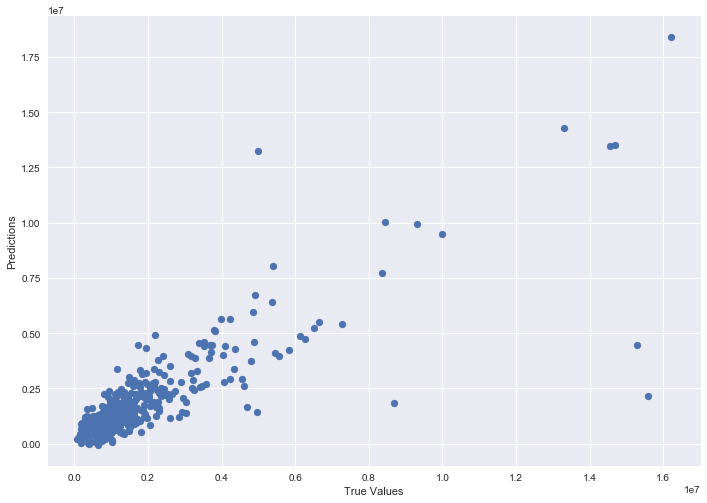

In [949]:
## The line / model
plt.scatter(y_test, pred_linear_reg)
plt.xlabel("True Values")
plt.ylabel("Predictions")

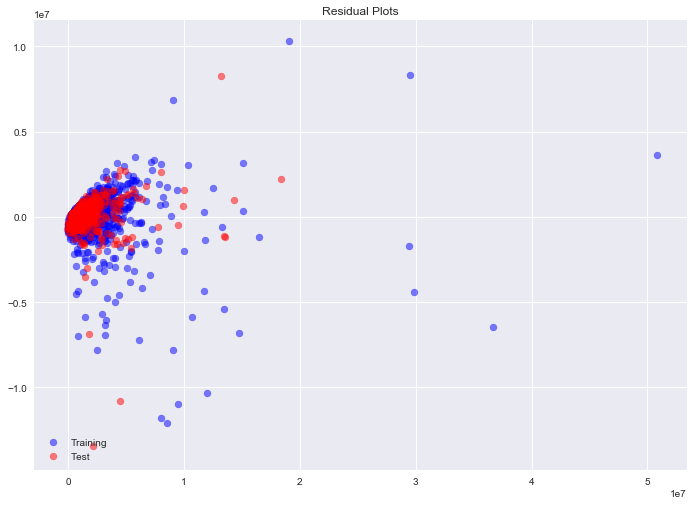

In [950]:
train_res = plt.scatter(pred_train,(pred_train-y_train),c='b',alpha=0.5)
test_res = plt.scatter(pred_test,(pred_test-y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train_res,test_res),('Training','Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()

In [951]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        02:28:37   Log-Likelihood:                -39014.
No. Observations:                2544   AIC:                         7.806e+04
Df Residuals:                    2530   BIC:                         7.814e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -349.9063    113.388     -3.086      0.002    -572.250    -127.563
x2          4512.6457   2914.858      1.548      0.122   -1203.105    1.02e+04
x3          6051.9983   1770.187      3.419      0.001    2580.835    9523.162
x4           802.0297     47.650     16.832      0.000     708.592     895.468
x5           202.2043     76.247      2.652      0.008      52.691     351.717
x6           651.8428    120.312      5.418      0.000     415.924     887.762
x7           664.8647     80.100      8.300      0.000     507.797     821.933
x8         -3649.4577    850.713     -4.290      0.000   -5317.622   -1981.293
x9          3715.7375   1074.996      3.457      0.001    1607.775    5823.700
x10         1045.4188     78.919     13.247      0.000     890.667    1200.170
x11          615.6045     81.522      7.551      0.000     455.747     775.461
x12         -837.2764    347.588     -2.409      0.016   -1518.862    -155.691
x13         6703.6302    435.579     15.390      0.000    5849.503    7557.757
x14          308.5459     36.579      8.435      0.000     236.818     380.274
==============================================================================
Omnibus:                     2161.059   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202029.492
Skew:                           3.487   Prob(JB):                         0.00
Kurtosis:                      46.096   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RIDGE REGRESSION

In [952]:
#Ridge Regression
#import ridge library
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)

In [953]:
#Fit the model
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [954]:
pred_train_ridge = ridgeReg.predict(X_train)
# Predict ridge regression on test
pred_test_ridge = ridgeReg.predict(X_test)

In [955]:
##calculating mse
mse_ridge = np.mean((pred_test_ridge - y_test)**2)
print ("Mean squared error of test for Ridge Regression ", mse_ridge)

Mean squared error of test for Ridge Regression  1.2531570323e+12


In [956]:
## calculating score
print("The score for Ridge Regression",ridgeReg.score(X_test,y_test)*100)

The score for Ridge Regression 68.3837097983


Text(0,0.5,'Predictions')

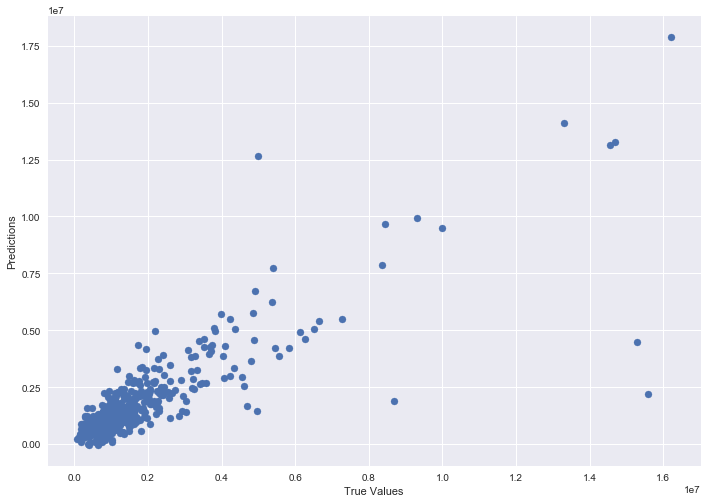

In [957]:
## The line / model
plt.scatter(y_test, pred_test_ridge)
plt.xlabel("True Values")
plt.ylabel("Predictions")

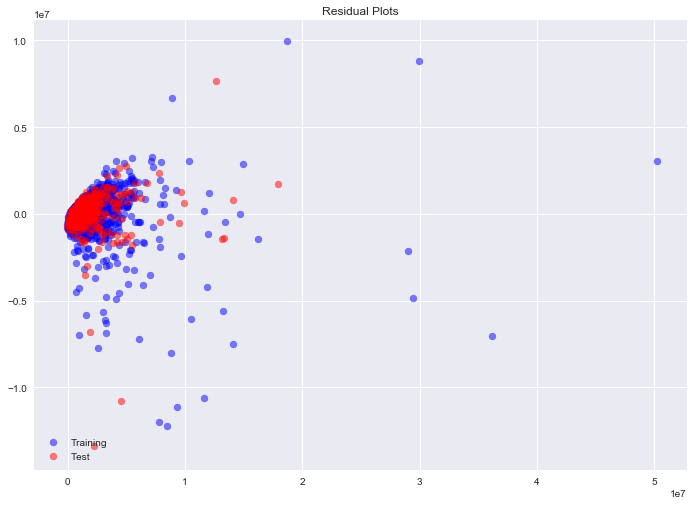

In [958]:
train_res = plt.scatter(pred_train_ridge,(pred_train_ridge-y_train),c='b',alpha=0.5)
test_res = plt.scatter(pred_test_ridge,(pred_test_ridge-y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train_res,test_res),('Training','Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()

# LASSO REGRESSION

In [959]:
#Lasso regression
#Import library for Lasso
from sklearn.linear_model import Lasso
#Train model for Lasso Regression
lassoReg = Lasso(alpha=0.3, normalize=True)

In [960]:
#Fit model with Lasso Regression
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [961]:
pred_train_lasso = ridgeReg.predict(X_train)

#Predict model on Lasso
pred_test_lasso = lassoReg.predict(X_test)

In [962]:
# calculating mse
mse_lasso = np.mean((pred_lasso - y_test)**2)
print ("Mean squared error of test for Lasso Regression ", mse_lasso)

Mean squared error of test for Lasso Regression  1.28840487675e+12


In [992]:
## calculating score
print("The score for Lasso Regression",lassoReg.score(X_test,y_test)*100)

The score for Lasso Regression 67.4944309208


Text(0,0.5,'Predictions')

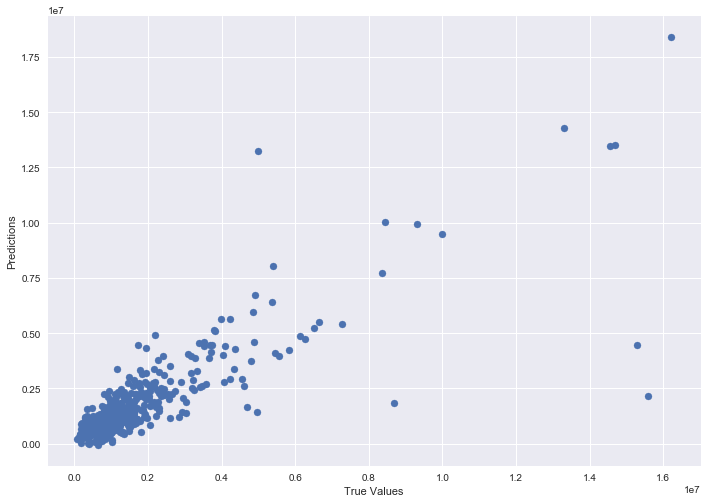

In [964]:
## The line / model
plt.scatter(y_test, pred_test_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")

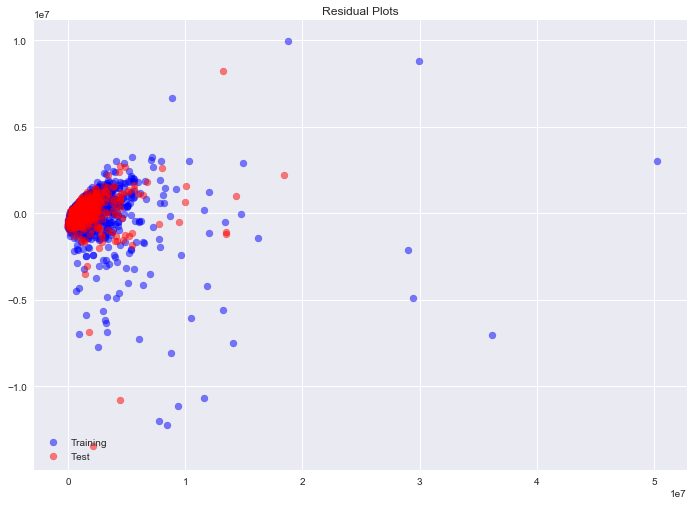

In [965]:
train_res = plt.scatter(pred_train_lasso,(pred_train_lasso-y_train),c='b',alpha=0.5)
test_res = plt.scatter(pred_test_lasso,(pred_test_lasso-y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train_res,test_res),('Training','Test'),loc='lower left')
plt.title('Residual Plots')
plt.show()

## Result of Regression:

1. Linear Regression - 67.49%
2. Ridge Regression - 68.38%
3. Lasso Regression - 67.5%

## From the above result, it can be concluded that Ridge Regression is the best fit model.

# Question 3: Are the Ted talk features correlated?

In [966]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']



import datetime
ted['film_date'] = ted['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
#ted['published_date'] = ted['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [967]:
hmap_fp = ted.copy()
hmap_fp['film_date'] = hmap_fp['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_fp = pd.pivot_table(hmap_fp[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_fp['month_num'] = hmap_fp['film_date'].apply(lambda x: months[x.split()[0]])
hmap_fp['year'] = hmap_fp['film_date'].apply(lambda x: x.split()[1])
hmap_fp = hmap_fp.sort_values(['year', 'month_num'])
hmap_fp = hmap_fp[['month_num', 'year', 'title']]
hmap_fp = hmap_fp.pivot('month_num', 'year', 'title')
hmap_fp = hmap_fp.fillna(0)

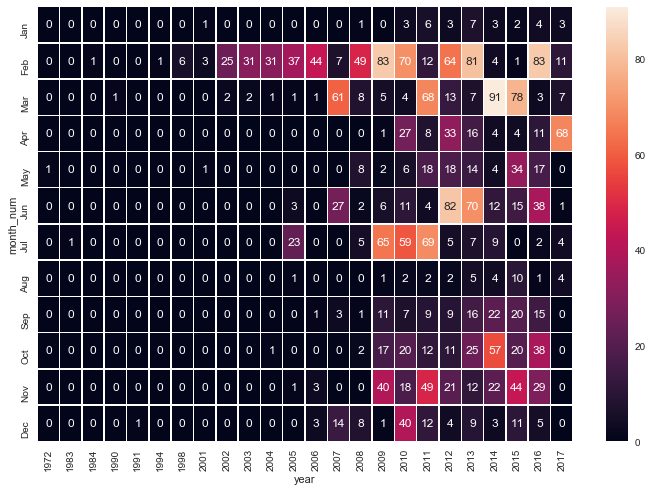

In [968]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(hmap_fp, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

## The heat map shows that from the year 2009 onwards, more number of Ted Talks have been made and published which led to higher viewership from then on.

### Correlation of Features

Text(0.5,1,'Heatmap of Correlation between Features')

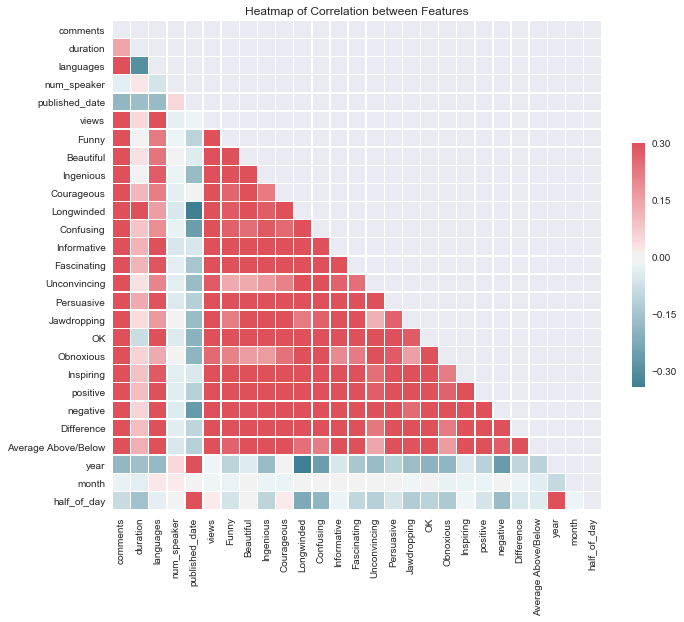

In [969]:
#Correlation of features

corr=ted.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features')

#### From  the heat map, we can conclude the below:

#### Ratings are highly correlated with Comments, i.e, higher the ratings- higher the comments.

#### Duration does shows less correlations with comments.

#### Higher views have greater number of comments thus strong correlation.

#### The number of languages have high correlation with views.

## Heatmap of Correlation between Features for top 10 TedTalks

In [970]:
top10=ted.nlargest(10,'views')

Text(0.5,1,'Heatmap of Correlation between Features for top 10 TedTalks')

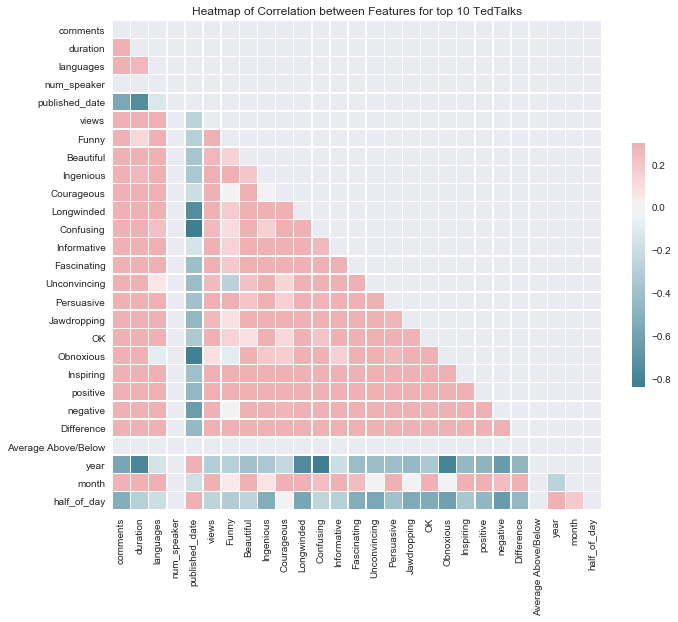

In [971]:
corr=top10.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation between Features for top 10 TedTalks')

### Similar correlation is observed for the top 10 highly viewed Ted talks.

### Hence we can conclude that our inference is correct.

# Sentiment Analysis on Ted Talk Description

#### We are performing sentiment analysis on the words expressed in description, especially in order to determine whether the speaker's attitude towards a particular topic is positive, negative, or neutral.

In [972]:
from textblob import TextBlob

In [973]:
polarity=[]
subjectivity=[]

In [974]:
for t in ted['description']:
        tx = TextBlob(t)
        polarity.append(tx.sentiment.polarity)
        subjectivity.append(tx.sentiment.subjectivity)

In [975]:
ted['Polarity']=polarity
ted['subjectivity']=subjectivity

In [976]:
ted.nlargest(5,'Polarity')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Inspiring,positive,negative,Difference,Average Above/Below,year,month,half_of_day,Polarity,subjectivity
1387,183,"People don't just cook anymore -- they're cooking, texting, talking on the phone, watching YouTube and uploading photos of the awesome meal they just made. Designer Paolo Cardini questions the efficiency of our multitasking world and makes the case for -- gasp -- ""monotasking.""",2.866667,TEDGlobal 2012,26-06-2012,48,Paolo Cardini,"Paolo Cardini: Forget multitasking, try monotasking",1,1354291786,...,284,1324,857,467,0,2012,11,1,1.00,1.00
135,36,"After Vusi Mahlasela's 3-song set at TEDGlobal, the audience wouldn't let him go. His encore, ""Woza,"" showcases his brilliant guitar playing and multilingual lyrics.",4.983333,TEDGlobal 2007,07-06-2007,1,Vusi Mahlasela,"Vusi Mahlasela: ""Woza""",1,1187695440,...,71,427,29,398,0,2007,8,0,0.90,1.00
2508,14,"When Richard J. Berry, the mayor of Albuquerque, saw a man on a street corner holding a cardboard sign that read ""Want a job,"" he decided to take him (and others in his situation) up on it. He and his staff started a citywide initiative to help the homeless by giving them day jobs and a place to sleep -- and the results were incredible. Find out how your city can replicate Albuquerque's model with this frank and optimistic talk.",12.350000,TEDxPennsylvaniaAvenue,08-02-2017,4,Richard J. Berry,Richard J. Berry: A practical way to help the homeless find work and safety,1,1503000023,...,112,326,21,305,0,2017,8,1,0.90,0.90
196,26,"Moneyman Steve Jurvetson takes TEDsters inside his awesome hobby -- launching model rockets –- by sharing some gorgeous photos, his infectious glee and just a whiff of danger.",3.366667,TED2007,02-03-2007,32,Steve Jurvetson,Steve Jurvetson: Model rocketry,1,1204115160,...,154,730,93,637,0,2008,2,0,0.85,0.95
1602,165,"How do we decide who we are? Hetain Patel's surprising performance plays with identity, language and accent -- and challenges you to think deeper than surface appearances. A delightful meditation on self, with performer Yuyu Rau, and inspired by Bruce Lee.",9.100000,TEDGlobal 2013,10-06-2013,36,Hetain Patel,Hetain Patel: Who am I? Think again,2,1382108360,...,265,1798,213,1585,0,2013,10,1,0.85,0.75


In [977]:
ted['Polarity'].mean()

0.15002879120576781

### The average polarity value for all the Ted Talks is 0.15; There is a balance in the positive and negative topics of Ted Talks and it varies on a large scale of attitudes.

In [980]:
ted.nsmallest(5,'Polarity')

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Inspiring,positive,negative,Difference,Average Above/Below,year,month,half_of_day,Polarity,subjectivity
1861,40,"An epidemic of bad, inefficient, overcrowded meetings is plaguing the world’s businesses — and making workers miserable. David Grady has some ideas on how to stop it.",6.566667,TED@State Street Boston,16-10-2013,37,David Grady,David Grady: How to save the world (or at least yourself) from bad meetings,1,1416240355,...,208,1522,316,1206,0,2014,11,1,-0.850000,0.833333
42,105,Oxford mathematician Peter Donnelly reveals the common mistakes humans make in interpreting statistics -- and the devastating impact these errors can have on the outcome of criminal trials.,21.333333,TEDGlobal 2005,13-07-2005,20,Peter Donnelly,Peter Donnelly: How juries are fooled by statistics,1,1162944660,...,87,1962,253,1709,0,2006,11,0,-0.566667,0.683333
154,432,"Vilayanur Ramachandran tells us what brain damage can reveal about the connection between celebral tissue and the mind, using three startling delusions as examples.",23.566667,TED2007,02-03-2007,35,VS Ramachandran,VS Ramachandran: 3 clues to understanding your brain,1,1192954500,...,969,11839,230,11609,1,2007,10,0,-0.500000,0.500000
272,16,"After Robert Lang's talk on origami at TED2008, Bruno Bowden stepped onstage with a challenge -- he would fold one of Lang's astonishingly complicated origami figures, blindfolded, in under 2 minutes. He's accompanied by the cellist Rufus Cappadocia.",2.966667,TED2008,01-02-2008,38,Bruno Bowden + Rufus Cappadocia,Bruno Bowden + Rufus Cappadocia: Blindfold origami and cello,2,1217552400,...,25,342,119,223,0,2008,8,0,-0.500000,1.000000
519,110,"TED Fellow and journalist Evgeny Morozov punctures what he calls ""iPod liberalism"" -- the assumption that tech innovation always promotes freedom, democracy -- with chilling examples of ways the Internet helps oppressive regimes stifle dissent.",11.883333,TEDGlobal 2009,22-07-2009,29,Evgeny Morozov,Evgeny Morozov: How the Net aids dictatorships,1,1253612340,...,30,458,253,205,0,2009,9,0,-0.500000,0.900000


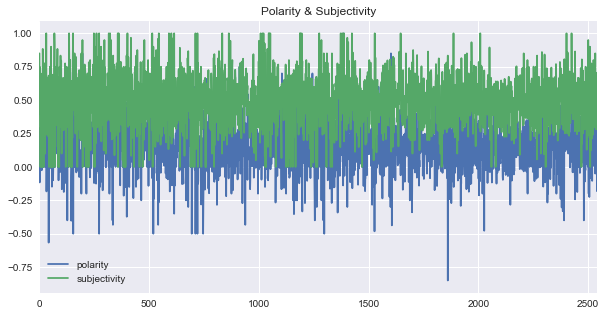

In [981]:
import matplotlib.pyplot as plot
%matplotlib inline

poltweet= pd.DataFrame({'polarity':polarity, 'subjectivity':subjectivity})
poltweet.plot(title='Polarity & Subjectivity',figsize=(10,5))


## Finding out most frequently used Tags in Ted Talk

In [982]:
ted['tags']=ted['tags'].astype(str)

In [983]:
wordstring=[]
list=[]
list= ted['tags']
wordstring = list[0][1:-1]
wordstring
n=1
while n < 2544:
    wordstring += list[n][1:-1]
    n=n+1
wordlist = wordstring.split()
#wordlist

In [984]:
counter = {}
for i in wordlist: counter[i] = counter.get(i, 0) + 1
counter
Popularnouns= sorted([ (freq,word) for word, freq in counter.items() ], reverse=True)[:20]
Popularnouns

[(539, "'global"),
 (479, "issues',"),
 (423, "'science',"),
 (383, "'design',"),
 (375, "'culture',"),
 (270, "'social"),
 (262, "change',"),
 (254, "'entertainment',"),
 (224, "'health',"),
 (223, "'innovation',"),
 (216, "'technology',"),
 (189, "'future',"),
 (189, "'business',"),
 (179, "'humanity',"),
 (169, "'communication',"),
 (159, "'environment',"),
 (152, "'medicine',"),
 (152, "'collaboration',"),
 (150, "'creativity',"),
 (149, "'biology',")]

In [985]:
import pandas as pd
labels=['Count','Words']
pop= pd.DataFrame.from_records(Popularnouns, columns=labels)
pop

,Count,Words
0,539,'global
1,479,"issues',"
2,423,"'science',"
3,383,"'design',"
4,375,"'culture',"
5,270,'social
6,262,"change',"
7,254,"'entertainment',"
8,224,"'health',"
9,223,"'innovation',"


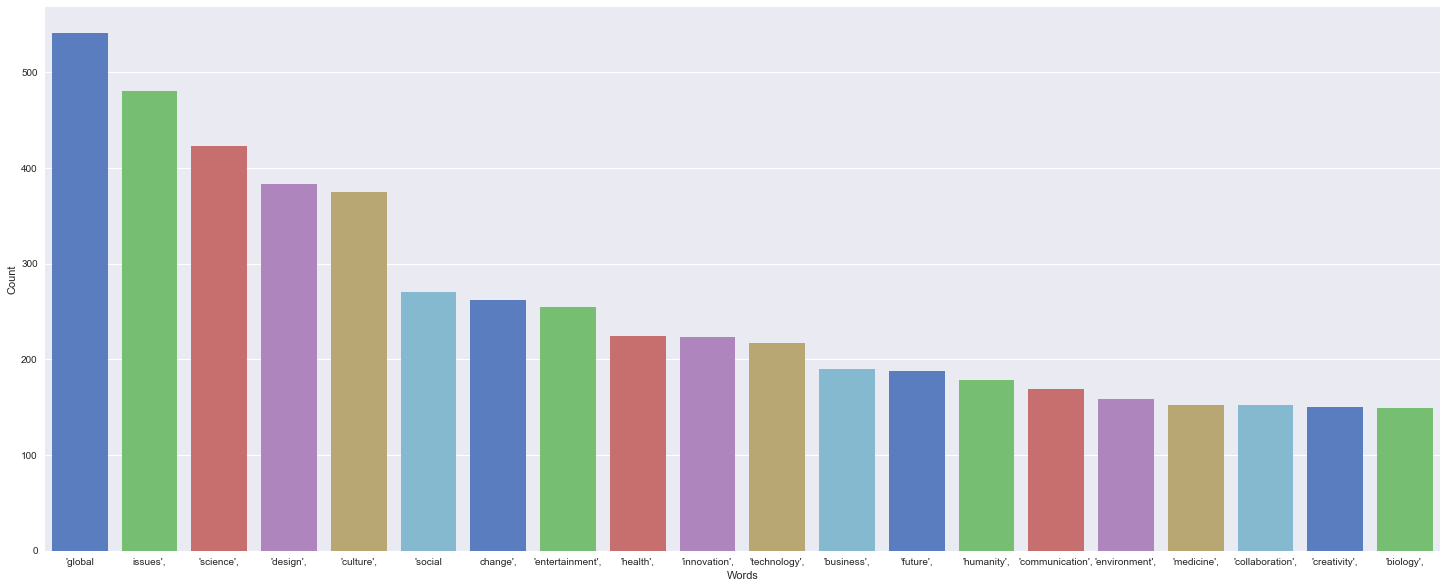

In [986]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 10)) # defining the size of figure
sns.barplot(x='Words', y='Count', data=df1,palette='muted',
 ax=ax) 
plt.show(fig)

### The highest trending tag is 'Global' which has been used more than 500 times followed by 'Issues' used more than 450 times.

# Limitations & Assumptions

Limitations: 

- We are not considering any external factors which might affect views & rating
- Not all viewers who have viewed the TED Talk may have commented and rated the speech

Assumption:

- We are assuming that people have given honest responses with respect to each TED Talk
- We are assuming that 'Ok' rating is a non-positive response while generating 2 columns: above average & below average 

# CONCLUSION:

### 1. Using various regression and classification techniques along with data visualization, we have concluded that the number of languages and duration are the highly influencing factors along with comments,rating and number of speakers that make Ted talks trending.

### 2. Majority of the Ted Talks are positively rated by viewers.

### 3. The Ted talk topic highly vary in positive and negative subjects.

### 4. There is a sharp increase in the  number of Ted talks published in 2009 which gradually increased viewership over time.

#### The highest viewed Ted Talk  video

In [990]:
pd.set_option('display.max_colwidth', -1)

In [991]:
url=ted.nlargest(1,'views')
path=(url['url']).to_string(index = False)


def play_movie(path):
    from os import startfile
    startfile(path)
    
    
class Video(object):
    def __init__(self,path):
        self.path = path
    def play(self):
        from os import startfile
        startfile(self.path)   

class Movie_MP4(Video):
    type = "MP4"
    
    
movie = Movie_MP4(path)
movie.play()

# References

https://www.kaggle.com/rounakbanik/ted-talks/data

http://blog.creativelive.com/rise-of-ted-talks/

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm

http://scikit-learn.org/stable/modules/naive_bayes.html (http://scikitlearn.org/stable/modules/naive_bayes.html)

http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/
(http://dataaspirant.com/2017/02/20/gaussian-naive-bayes-classifier-implementation-python/)

http://scikit-learn.org/stable/modules/svm.html (http://scikitlearn.org/stable/modules/svm.html)